In [7]:
"""
Author:
Micah Vandersteen

Date:
19 January 2020

Purpose:
The purpose of this script is to visualize the weather of 500+ cities across
the world using the OpenWeatherMap API to develop a representative model of 
weather across the world.
"""

'\nAuthor:\nMicah Vandersteen\n\nDate:\n19 January 2020\n\nPurpose:\nThe purpose of this script is to visualize the weather of 500+ cities across\nthe world using the OpenWeatherMap API to develop a representative model of \nweather across the world.\n'

In [8]:
# IMPORTING DEPENDENCIES
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

In [9]:
# SETTING UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# DEFINING DESIRED UNITS
units = "imperial"

# BUILD PARTIAL QUERY URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [10]:
# INITIALIZING OUTPUT .CSV FILE
output_data_file = "../output_data/weather.csv"

In [11]:
# SETTING UP RANGE OF LATITUDE AND LONGITUDE
lat_range = (-90, 90)

lng_range = (-180, 180)

In [12]:
# RANDOMLY SELECT AT LIST OF UNIQUE CITIES BASED ON LONGITUDE AND LATITUDE
# INITIALIZE LIST TO HOLD COORDINATES AND CITIES
city_coordinates = []

cities = []

# RANDOMLY SELECT VARIOUS LATITUDE AND LONGITUDE COMBINATIONS
latitudes = np.random.uniform(low = -90.000, high = 90.000, size = 1500)

longitudes = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

city_coordinates = zip(latitudes, longitudes)

# GET NEAREST CITY FOR EACH SET OF COORDINATES
for coordinate in city_coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # CHECK FOR UNIQUE CITY, ADD TO CITIES LIST IF IT IS UNIQUE
    if city not in cities:
        
        cities.append(city)

In [13]:
# PERFORM WEATHER CHECK ON EACH OF THE CITIES USING API 
# REQUEST API INFORMATION
# PRINT LOG EACH CITY NUMBER AND NAME WITH WEATHER INFORMATION

# INITIALIZE DESIRED LISTS FOR GENERAL VARIABLES AND DESIRED SCATTER PLOTS
found_cities = []
found_cities_temperatures = []
found_cities_humidity = []
found_cities_cloudiness = []
found_cities_wind_speed = []
found_cities_latitudes = []
found_cities_longitudes = []

# SOUTHERN HEMISPHERE LIST BREAKDOWN
southern_cities = []
southern_temperatures = []
southern_humidities = []
southern_cloudiness = []
southern_wind_speed = []
southern_latitudes = []

# NORTHERN HEMISPHERE LIST BREAKDOWN
northern_cities = []
northern_temperatures = []
northern_humidities = []
northern_cloudiness = []
northern_wind_speed = []
northern_latitudes = []

# FOR LOOP TO ITTERATE THROUGH THE LIST OF FOUND CITIES
print("----------------STARTING DATA COLLECTION---------------------")
for city in cities:
    
    # GETTING RESPONSE FROM API
    response = requests.get(query_url + city).json()
    
    # TRY TO APPEND ALL DESIRED VALUES TO RESPECTIVE LISTS IF THE CITY EXISTS IN API
    try:
        
        print(f"Processing record of {city}, {response['id']}")
        
        found_cities.append(response['name'])
        
        found_cities_temperatures.append(response['main']['temp'])
        
        found_cities_humidity.append(response['main']['humidity'])
        
        found_cities_cloudiness.append(response['clouds']['all'])
        
        found_cities_wind_speed.append(response['wind']['speed'])
        
        found_cities_latitudes.append(response['coord']['lat'])
        
        found_cities_longitudes.append(response['coord']['lon'])
        
        # CONDITIONAL TO CHECK LATITUDE TO DETERMINE IF CITY IS IN NORTHERN OR SOUTHERN HEMISPHERE
        # APPENDS DESIRED VALUES TO CORRESPONDING NORTHERN HEMISPHERE LIST
        if ( response['coord']['lat'] >= 0 ):
    
            northern_cities.append(response['name'])
        
            northern_temperatures.append(response['main']['temp'])
            
            northern_humidities.append(response['main']['humidity'])
            
            northern_cloudiness.append(response['clouds']['all'])
            
            northern_wind_speed.append(response['wind']['speed'])
            
            northern_latitudes.append(response['coord']['lat'])
    
        elif ( response['coord']['lat'] < 0 ):
    
            southern_cities.append(response['name'])
        
            southern_temperatures.append(response['main']['temp'])
            
            southern_humidities.append(response['main']['humidity'])
            
            southern_cloudiness.append(response['clouds']['all'])
            
            southern_wind_speed.append(response['wind']['speed'])
            
            southern_latitudes.append(response['coord']['lat'])
        
    except KeyError:
        
        print(f"The record for: {city} was not found")

print("----------------DATA COLLECTION COMPLETE---------------------")
print(f"YOU FOUND {len(found_cities)} CITIES TO ANALYZE")

----------------STARTING DATA COLLECTION---------------------
Processing record of stephenville, 4734350
Processing record of bulgan, 2032201
Processing record of rikitea, 4030556
Processing record of ushuaia, 3833367
The record for: samalaeulu was not found
Processing record of thompson, 6165406
The record for: amderma was not found
The record for: illoqqortoormiut was not found
Processing record of bambous virieux, 1106677
Processing record of coquimbo, 3893629
Processing record of butaritari, 2110227
Processing record of qaanaaq, 3831208
Processing record of ewo, 2260009
Processing record of tasiilaq, 3424607
Processing record of jega, 2336237
Processing record of torbay, 6167817
Processing record of jishou, 1805270
Processing record of hermanus, 3366880
Processing record of alofi, 4036284
Processing record of bluff, 2206939
Processing record of airai, 1651810
Processing record of khakhea, 933649
Processing record of boa vista, 3664980
Processing record of tuatapere, 2180815
Process

Processing record of poya, 2138522
Processing record of arroyo, 3129371
Processing record of torata, 3927158
Processing record of tadine, 2138285
Processing record of half moon bay, 5354943
Processing record of hamilton, 4513583
Processing record of ojinaga, 3994469
The record for: tabiauea was not found
Processing record of khatanga, 2022572
Processing record of yeppoon, 2142316
Processing record of goundi, 2431736
The record for: belushya guba was not found
Processing record of ruteng, 1629380
Processing record of rio grande, 3451138
Processing record of vardo, 777019
Processing record of elat, 295277
Processing record of komsomolsk, 6559559
Processing record of vao, 2137773
Processing record of provideniya, 4031574
Processing record of mount pleasant, 4588165
Processing record of hualmay, 3939761
Processing record of leon valley, 4705923
Processing record of sibu, 1735902
Processing record of mitsamiouli, 921786
Processing record of lasa, 3175096
Processing record of clarence town, 

Processing record of rehoboth, 3353540
Processing record of jeremie, 3723593
Processing record of peddapalli, 1259961
Processing record of zemio, 235826
Processing record of vestmanna, 2610343
Processing record of henties bay, 3356832
Processing record of bandar, 1215498
Processing record of kaitangata, 2208248
Processing record of innisfail, 2162683
Processing record of esperance, 2071860
Processing record of saldanha, 3361934
Processing record of ust-maya, 2013918
Processing record of sarkand, 1519691
Processing record of astaneh-ye ashrafiyeh, 142679
Processing record of yar-sale, 1486321
Processing record of savannah bight, 3601402
Processing record of gazimurskiy zavod, 2024122
Processing record of san policarpo, 1688696
Processing record of muscat, 287286
Processing record of pacific grove, 5380437
Processing record of chara, 2025630
Processing record of deputatskiy, 2028164
Processing record of sao filipe, 3374210
Processing record of georgetown, 1735106
Processing record of cha

In [14]:
# CREATE DATAFRAME FOR FOUND CITY INFORMATION, THEN SAVE DATAFRAME TO OUTPUT CSV
# CREATING DATAFRAME 
output_data_file_df = pd.DataFrame({"City Name" : found_cities,
                                    "Temperature (F)" : found_cities_temperatures,
                                    "Humidity (%)" : found_cities_humidity,
                                    "Cloudiness (%)" : found_cities_cloudiness,
                                    "Wind Speed (MPH)" : found_cities_wind_speed,
                                    "Latitude" : found_cities_latitudes,
                                    "Longitude" : found_cities_longitudes})
        
# EXPORTING SAVED DATAFRAME TO .CSV FILE
output_data_file_df.to_csv(output_data_file, index = False, header = True)

# SHOWING OUTPUT DATAFRAME FIRST 5 ROWS
output_data_file_df.head()

,City Name,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Latitude,Longitude
0,Stephenville,33.80,74,1,5.82,32.22,-98.20
1,Bulgan,-13.54,77,0,3.38,48.81,103.53
2,Rikitea,78.98,80,73,15.79,-23.12,-134.97
3,Ushuaia,56.21,71,75,7.67,-54.80,-68.30
4,Thompson,23.00,85,90,11.41,55.74,-97.86


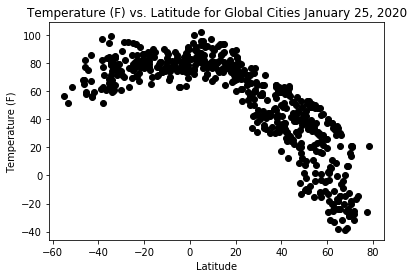

In [15]:
# BUILD A SCATTER PLOT TO SHOWCASE TEMPERATURE (F) VERSUS LATITUDE
plt.scatter(found_cities_latitudes, found_cities_temperatures, color = 'black')
plt.title('Temperature (F) vs. Latitude for Global Cities January 25, 2020')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("../Images/temp_v_lat.png")


The plot above is a scatter plot representing the relationship between Temperature (F) and Latitude accross our world's cities.

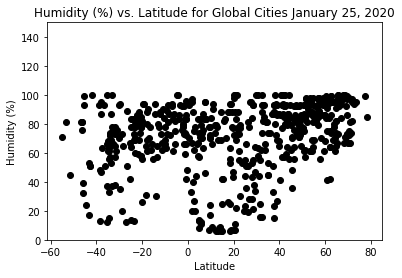

In [16]:
# BUILD A SCATTER PLOT TO SHOWCASE HUMIDITY (%) VERSUS LATITUDE
plt.scatter(found_cities_latitudes, found_cities_humidity, color = 'black')
plt.title('Humidity (%) vs. Latitude for Global Cities January 25, 2020')
plt.ylim((0,150))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/humidity_v_lat.png")


The plot above is a scatter plot representing the relationship between humidity percentage and latitude across our world's cities.

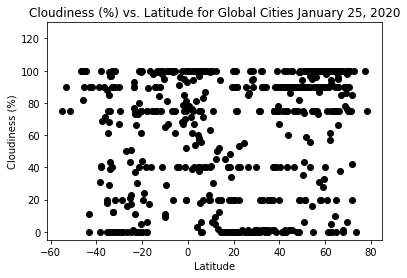

In [17]:
# BUILD A SCATTER PLOT TO SHOWCASE CLOUDINESS (%) VERSUS LATITUDE
plt.scatter(found_cities_latitudes, found_cities_cloudiness, color = 'black')
plt.title('Cloudiness (%) vs. Latitude for Global Cities January 25, 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim((-5,130))
plt.savefig("../Images/cloudiness_v_lat.png")

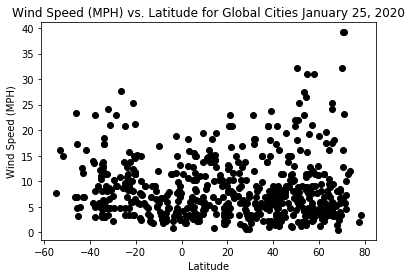

In [18]:
# BUILD A SCATTER PLOT TO SHOWCASE WIND SPEED (MPH) VERSUS LATITUDE
plt.scatter( found_cities_latitudes, found_cities_wind_speed, color = 'black')
plt.title('Wind Speed (MPH) vs. Latitude for Global Cities January 25, 2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig("../Images/wind_speed_v_lat.png")


The scatter plot above represents the relationship between wind speed (MPH) and latitude for cities across the world.

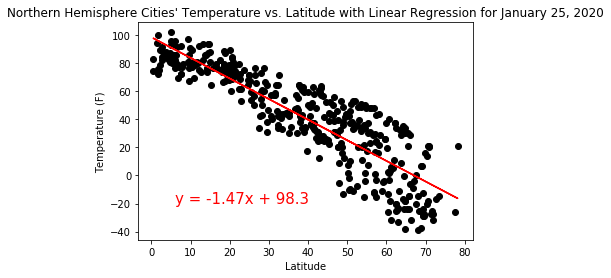

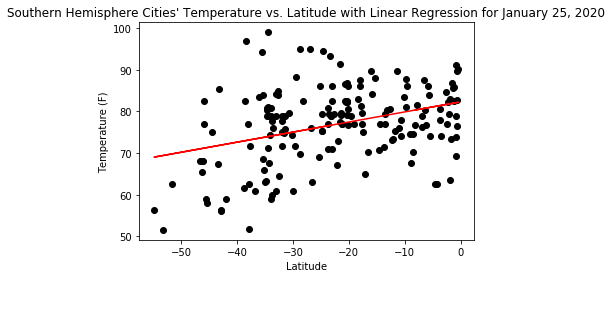

In [19]:
# BUILD A SCATTER PLOT WITH LINEAR REGRESSION FOR NORTHERN AND SOUTHERN HEMISPHERE CITIES' TEMPERATURE VS LATITUDE

# FOR THE NORTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_ntemp = northern_latitudes
y_values_ntemp = northern_temperatures

# PERFORMING REGRESSION USING LIST COMPREHENSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_ntemp, y_values_ntemp)
regress_values_ntemp = [i * slope + intercept for i in x_values_ntemp]
line_eq_ntemp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT 
plt.scatter(x_values_ntemp, y_values_ntemp, color = 'black')
plt.plot(x_values_ntemp, regress_values_ntemp, "r-")
plt.title("Northern Hemisphere Cities' Temperature vs. Latitude with Linear Regression for January 25, 2020")
plt.annotate(line_eq_ntemp, (6,-20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("../Images/north_temp_v_lat.png")
plt.show()


# FOR THE SOUTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_stemp = southern_latitudes
y_values_stemp = southern_temperatures

# PERFORMING REGRESSION USING LIST COMPREHENSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_stemp, y_values_stemp)
regress_values_stemp = [i * slope + intercept for i in x_values_stemp]
line_eq_stemp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT
plt.scatter(x_values_stemp,y_values_stemp, color = 'black')
plt.plot(x_values_stemp,regress_values_stemp,"r-")
plt.annotate(line_eq_stemp,(-30,35),fontsize=15,color="red")
plt.title("Southern Hemisphere Cities' Temperature vs. Latitude with Linear Regression for January 25, 2020")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("../Images/south_temp_v_lat.png")
plt.show()


The linear regression lines in the plot above represent 

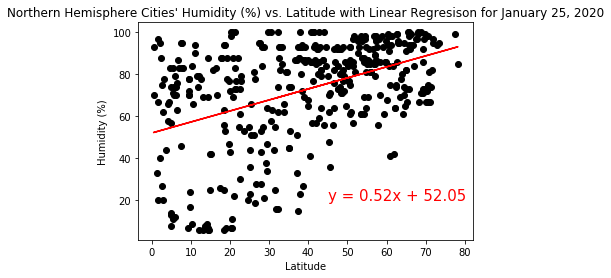

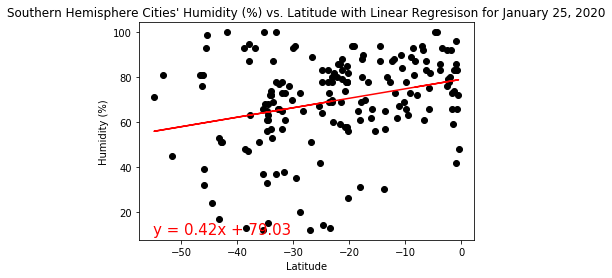

In [20]:
# BUILD A SCATTER PLOT WITH LINEAR REGRESSION FOR NORTHERN AND SOUTHERN HEMISPHERE CITIES' HUMIDITY VS LATITUDE
# FOR THE NORTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_nhum = northern_latitudes
y_values_nhum = northern_humidities

# PERFORMING REGRESSION USING LIST COMPREHENSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_nhum, y_values_nhum)
regress_values_nhum = [i * slope + intercept for i in x_values_nhum]
line_eq_nhum = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT 
plt.scatter(x_values_nhum,y_values_nhum, color = 'black')
plt.plot(x_values_nhum,regress_values_nhum,"r-")
plt.title("Northern Hemisphere Cities' Humidity (%) vs. Latitude with Linear Regresison for January 25, 2020")
plt.annotate(line_eq_nhum, (45,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/north_humidity_v_lat.png")
plt.show()


# FOR THE SOUTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_shum = southern_latitudes
y_values_shum = southern_humidities

# PERFORMING REGRESSION USING LIST COMPREHENSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_shum, y_values_shum)
regress_values_shum = [i * slope + intercept for i in x_values_shum]
line_eq_shum = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT 
plt.scatter(x_values_shum,y_values_shum, color = 'black')
plt.plot(x_values_shum,regress_values_shum,"r-")
plt.title("Southern Hemisphere Cities' Humidity (%) vs. Latitude with Linear Regresison for January 25, 2020")
plt.annotate(line_eq_shum, (-55,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/south_humidity_v_lat.png")
plt.show()


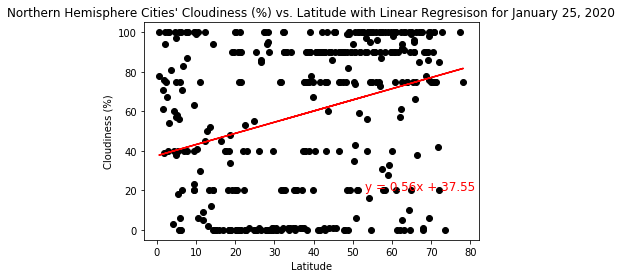

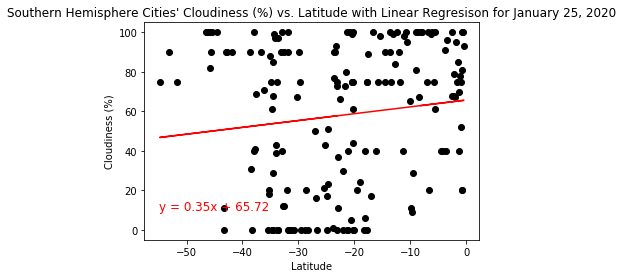

In [21]:
# BUILD A SCATTER PLOT WITH LINEAR REGRESSION FOR NORTHERN AND SOUTHERN HEMISPHERE CITIES' CLOUDINESS VS LATITUDE
# FOR THE NORTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_ncloud = northern_latitudes
y_values_ncloud = northern_cloudiness

# PERFORMING REGRESSION USING LIST COMPREHENSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_ncloud, y_values_ncloud)
regress_values_ncloud = [i * slope + intercept for i in x_values_ncloud]
line_eq_ncloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT 
plt.scatter(x_values_ncloud,y_values_ncloud, color = 'black')
plt.plot(x_values_ncloud,regress_values_ncloud,"r-")
plt.title("Northern Hemisphere Cities' Cloudiness (%) vs. Latitude with Linear Regresison for January 25, 2020")
plt.annotate(line_eq_ncloud, (53, 20), fontsize = 12, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Images/north_cloudiness_v_lat.png")
plt.show()


# FOR THE SOUTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_scloud = southern_latitudes
y_values_scloud = southern_cloudiness

# PERFORMING REGRESSION USING LIST COMPREHENSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_scloud, y_values_scloud)
regress_values_scloud = [i * slope + intercept for i in x_values_scloud]
line_eq_scloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT 
plt.scatter(x_values_scloud,y_values_scloud, color = 'black')
plt.plot(x_values_scloud,regress_values_scloud,"r-")
plt.title("Southern Hemisphere Cities' Cloudiness (%) vs. Latitude with Linear Regresison for January 25, 2020")
plt.annotate(line_eq_scloud, (-55, 10), fontsize = 12, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Images/south_cloudiness_v_lat.png")
plt.show()


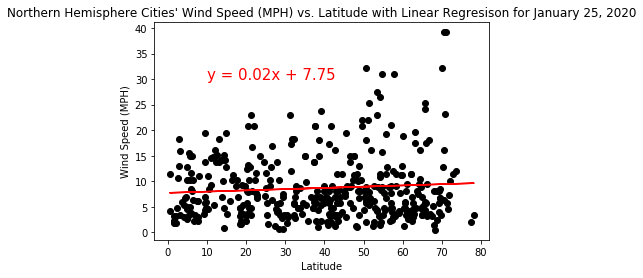

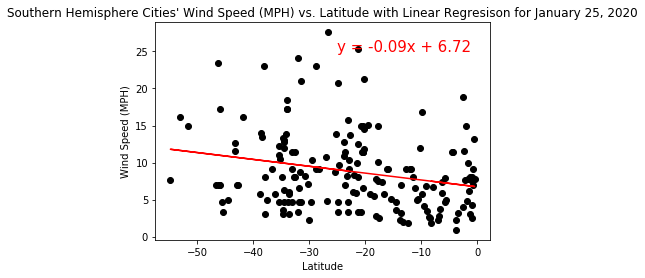

In [22]:
# BUILD A SCATTER PLOT WITH LINEAR REGRESSION FOR NORTHERN AND SOUTHERN HEMISPHERE CITIES' WIND SPEED VS LATITUDE
# FOR THE NORTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_nws = northern_latitudes
y_values_nws = northern_wind_speed

# PERFORMING REGRESSION USING LIST COMPREHENSION 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_nws, y_values_nws)
regress_values_nws = [i * slope + intercept for i in x_values_nws]
line_eq_nws = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT 
plt.scatter(x_values_nws,y_values_nws, color = 'black')
plt.plot(x_values_nws,regress_values_nws,"r-")
plt.title("Northern Hemisphere Cities' Wind Speed (MPH) vs. Latitude with Linear Regresison for January 25, 2020")
plt.annotate(line_eq_nws, (10, 30), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig("../Images/north_wind_speed_v_lat.png")
plt.show()


# FOR THE SOUTHERN HEMISPHERE
# DEFINING X AND Y VALUES
x_values_sws = southern_latitudes
y_values_sws = southern_wind_speed

# PERFORMING REGRESSION USING LIST COMPREHENSION 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_sws, y_values_sws)
regress_values_sws = [i * slope + intercept for i in x_values_sws]
line_eq_sws = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# SETTING UP PLOT 
plt.scatter(x_values_sws,y_values_sws, color = 'black')
plt.plot(x_values_sws,regress_values_sws,"r-")
plt.title("Southern Hemisphere Cities' Wind Speed (MPH) vs. Latitude with Linear Regresison for January 25, 2020")
plt.annotate(line_eq_sws, (-25, 25), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig("../Images/south_wind_speed_v_lat.png")
plt.show()

Three observable trends in this data are:
1) Cloudiness and Humidity have weak correlations with latitude.
2) Temperature and latitude have moderate/strong correlations and are inverse of each other when we cross the equator, which intuitively makes sense as the seasons are opposite times during the year.
3) In general, temperature is negative correlated with latitude on the global scale.